Load in data

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing #Import Label Encoder

#Bring in the train test and split function
from sklearn.model_selection import train_test_split

#Load data
data=pd.read_csv('HR_comma_sep.csv')
#Load first few rows
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
#Label Encoder variable
labelEncoder = preprocessing.LabelEncoder()

#Convert strings to numbers (0,1,etc.)
data['department']=labelEncoder.fit_transform(data['department'])
data['salary']=labelEncoder.fit_transform(data['salary'])

Visualize relations between data

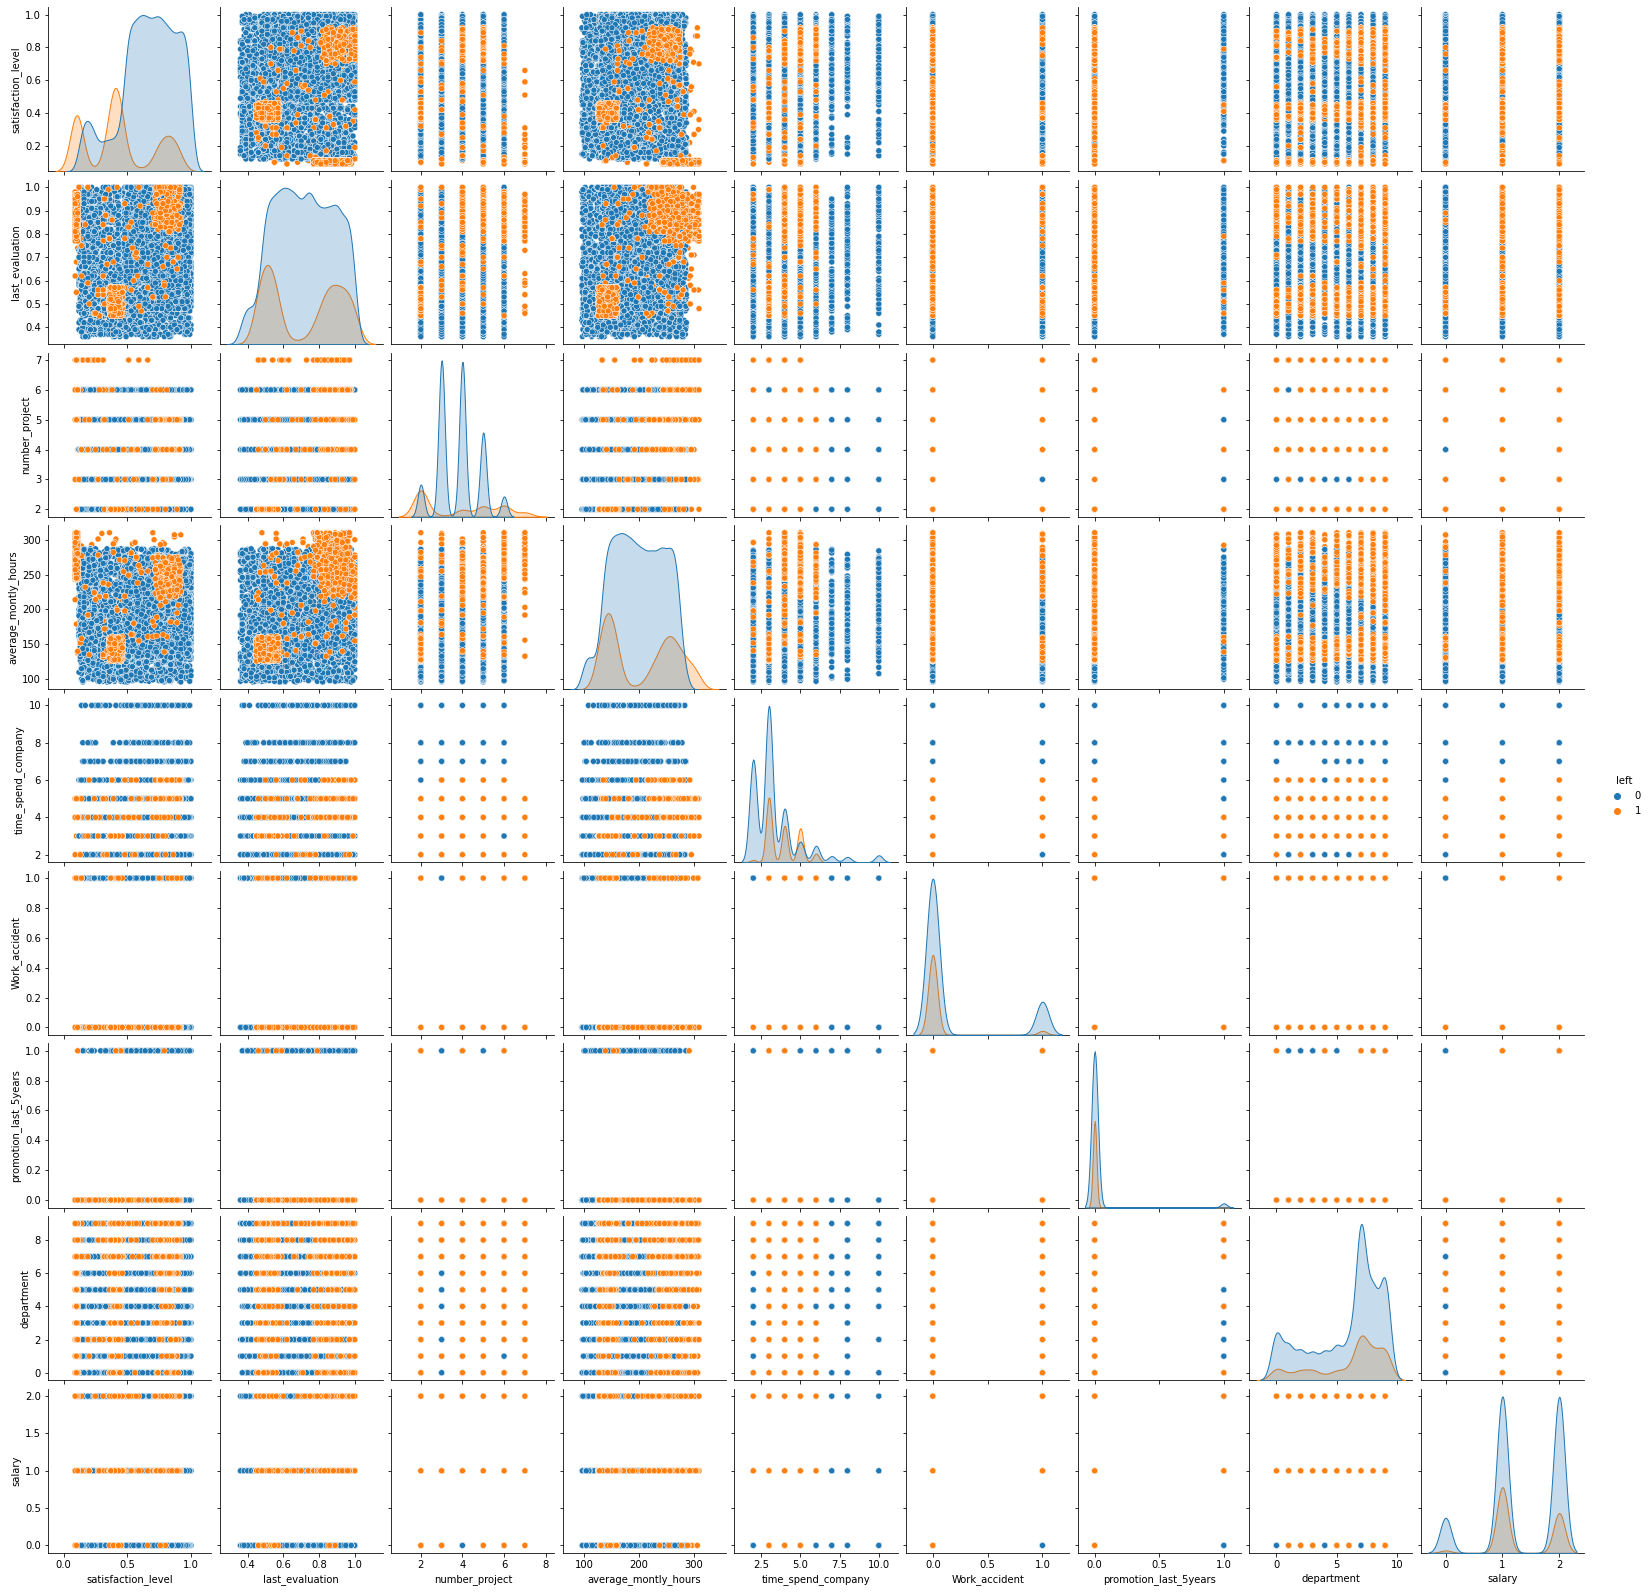

In [37]:
sns.pairplot( data=data, vars=('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary'), hue='left' )

In [47]:
#Split data
x=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary']]
y=data['left']

#Split the data into 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [72]:
#Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
"""
Creating instance of the MLPClassifier class from scikit-learn library in Python
The parameters passed to the constructor of the MLPClassifier instance include:
    hidden_layer_sizes: a tuple that specifies the number of neurons in each 
    hidden layer of the neural network. In this case, there are 
    two hidden layers with 20 and 19 neurons, respectively.
    
    random_state: a parameter that sets the seed for the random number 
    generator used for weight initialization.
    
    activation='relu': The activation function to use for the hidden layers. 
    In this case, the Rectified Linear Unit (ReLU) activation function is used.
   
    solver='adam': The optimization algorithm to use. Adam is an adaptive 
    learning rate optimization algorithm that is well-suited for large datasets
    and complex neural networks

    alpha=0.0001: The L2 regularization parameter. This parameter controls 
    the amount of weight decay applied to the network weights to prevent overfitting.

    verbose: a boolean flag that determines whether to print progress 
    messages during training.
    
    learning_rate_init: parameter that specifies initial learning rate for NN.
"""
mlpFunction = MLPClassifier(hidden_layer_sizes = (20,19), activation = 'relu', 
                            solver = 'adam', max_iter = 200, alpha = 0.0001,
                            random_state = 5, verbose = True, learning_rate_init = 0.01)

#Fit the data to the model
mlpFunction.fit(x_train,y_train)

Iteration 1, loss = 2.39450255
Iteration 2, loss = 0.55903090
Iteration 3, loss = 0.55278224
Iteration 4, loss = 0.52352683
Iteration 5, loss = 0.47161572
Iteration 6, loss = 0.41422501
Iteration 7, loss = 0.38492031
Iteration 8, loss = 0.41013527
Iteration 9, loss = 0.35376904
Iteration 10, loss = 0.33746495
Iteration 11, loss = 0.32004438
Iteration 12, loss = 0.31912130
Iteration 13, loss = 0.30768559
Iteration 14, loss = 0.30063800
Iteration 15, loss = 0.28491491
Iteration 16, loss = 0.28773481
Iteration 17, loss = 0.30770243
Iteration 18, loss = 0.29600675
Iteration 19, loss = 0.27673666
Iteration 20, loss = 0.28574587
Iteration 21, loss = 0.28329748
Iteration 22, loss = 0.31722560
Iteration 23, loss = 0.27777801
Iteration 24, loss = 0.27194536
Iteration 25, loss = 0.27121881
Iteration 26, loss = 0.27494294
Iteration 27, loss = 0.28230055
Iteration 28, loss = 0.26772265
Iteration 29, loss = 0.25951172
Iteration 30, loss = 0.26708832
Iteration 31, loss = 0.27093311
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 19), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [73]:
#Use test data to make predictions
yPred = mlpFunction.predict(x_test)

#Import accuracy score and calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yPred)

0.9517333333333333